# Tidy Tuesdays 2

For the second Tidy Tuesdays activity, the dataset chosen was that on Pokemon with stats taken from https://www.kaggle.com/abcsds/pokemon , where the aim is to find the strongest or best Pokemon to create the best Pokemon team.

In [1022]:
# Data analysis and data preparation
import pandas as pd
import numpy as np
import random as rnd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation

### Examining of Data

The dataset was examined to get a better idea of its contents.

In [1023]:
pkmn_df = pd.read_csv('Pokemon.csv')

pkmn_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [1024]:
pkmn_df.tail(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


This data set records the stats of the first 721 Pokemon. The number of data entries amounts to 800 however, which is due to the inclusion of extra entries for certain Pokemon, which record the stats of their alternate forms or Mega Evolution forms, such as the entries of Venusaur, Diancie (who have Mega Evolved forms), and Hoopa (who has a Confined form and an Unbound form) shown above.

In [1025]:
pkmn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [1026]:
pkmn_df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Note that while there are 386 null values in the column under Type 2, this simply means that there are monotype Pokemon, and therefore do not affect how Pokemon with the best stats are determined. It is for this reason that the null values will not be removed.

In [1027]:
pkmn_df['Type 1'].nunique()

18

In [1028]:
pkmn_df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [1029]:
pkmn_df['Type 2'].nunique()

18

In [1030]:
pkmn_df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

The dataset records 18 unique Pokemon types, which can either be a Pokemon's primary or secondary type.

In [1031]:
pkmn_df['Generation'].nunique()

6

In [1032]:
pkmn_df['Generation'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

Additionally, there are six generations of Pokemon recorded in the dataset.

In [1033]:
pkmn_df['Name'].unique()

array(['Bulbasaur', 'Ivysaur', 'Venusaur', 'VenusaurMega Venusaur',
       'Charmander', 'Charmeleon', 'Charizard',
       'CharizardMega Charizard X', 'CharizardMega Charizard Y',
       'Squirtle', 'Wartortle', 'Blastoise', 'BlastoiseMega Blastoise',
       'Caterpie', 'Metapod', 'Butterfree', 'Weedle', 'Kakuna',
       'Beedrill', 'BeedrillMega Beedrill', 'Pidgey', 'Pidgeotto',
       'Pidgeot', 'PidgeotMega Pidgeot', 'Rattata', 'Raticate', 'Spearow',
       'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew',
       'Sandslash', 'Nidoran♀', 'Nidorina', 'Nidoqueen', 'Nidoran♂',
       'Nidorino', 'Nidoking', 'Clefairy', 'Clefable', 'Vulpix',
       'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat',
       'Oddish', 'Gloom', 'Vileplume', 'Paras', 'Parasect', 'Venonat',
       'Venomoth', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck',
       'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine',
       'Poliwag', 'Poliwhirl', 'Poliwrath', 'Abra', 'Kadabra',

The list of unique Pokemon names shows inconsistent formats for Pokemon with Mega Evolutions and alternate forms.

### Renaming Mega Evolution Names

The data entries containing the stats of Mega Evolved Pokemon have duplicated names of the base Pokemon, resulting in a format of \<Pokemon name>Mega\<Pokemon name>. The duplicated Pokemon name before the word "Mega" will be removed for readability.

In [1034]:
new_pkmn_df = pkmn_df
new_pkmn_df['Name'] = new_pkmn_df['Name'].str.replace('.*(?=Mega)','')

new_pkmn_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [1035]:
pkmn_df['Name'].unique()

array(['Bulbasaur', 'Ivysaur', 'Venusaur', 'Mega Venusaur', 'Charmander',
       'Charmeleon', 'Charizard', 'Mega Charizard X', 'Mega Charizard Y',
       'Squirtle', 'Wartortle', 'Blastoise', 'Mega Blastoise', 'Caterpie',
       'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill',
       'Mega Beedrill', 'Pidgey', 'Pidgeotto', 'Pidgeot', 'Mega Pidgeot',
       'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans', 'Arbok',
       'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash', 'Nidoran♀',
       'Nidorina', 'Nidoqueen', 'Nidoran♂', 'Nidorino', 'Nidoking',
       'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff',
       'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom', 'Vileplume',
       'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett', 'Dugtrio',
       'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey', 'Primeape',
       'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl', 'Poliwrath',
       'Abra', 'Kadabra', 'Alakazam', 'Mega Alakazam', 'Machop',
       'Machoke',

### Reformatting Pokemon Names with Alternate Forms

The data entries containing the stats of Pokemon with alternate forms have  names in inconsistent formats, with some having duplicated Pokemon names similar to the inital format of Mega Evolved Pokemon, while the rest of the entries lack spacing between the Pokemon name and form name. These issues will be fixed and formatted into \<Pokemon name>\<space>\<form name> for readability and consistency.

In [1036]:
#renaming entries with duplicated Pokemon name
new_pkmn_df['Name'] = new_pkmn_df['Name'].str.replace('.*(?=Hoopa)','')
new_pkmn_df['Name'] = new_pkmn_df['Name'].str.replace('.*(?=Primal)','')
new_pkmn_df['Name'] = new_pkmn_df['Name'].str.replace('.*(?=Black)','')
new_pkmn_df['Name'] = new_pkmn_df['Name'].str.replace('.*(?=White)','')

new_pkmn_df.tail(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,Hoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,Hoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [1037]:
#removing spaces in all entries under Name column to format in camel case
new_pkmn_df['Name'] = new_pkmn_df['Name'].str.replace(' ','')

new_pkmn_df.tail(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
785,711,GourgeistSmallSize,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,711,GourgeistLargeSize,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,711,GourgeistSuperSize,Ghost,Grass,494,85,100,122,58,75,54,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50%Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True


In [1038]:
#inserting spaces into the camel case format of the entries under Name column
new_pkmn_df['Name'] = new_pkmn_df['Name'].str.replace('(?<=.)(?=[A-Z])',' ')
new_pkmn_df.tail(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
785,711,Gourgeist Small Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,711,Gourgeist Large Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,711,Gourgeist Super Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True


In [1039]:
#special case of inserting space between the Pokemon name Zygarde and '50%'
new_pkmn_df['Name'] = new_pkmn_df['Name'].str.replace('(?<=.)(?=5)',' ')
new_pkmn_df.tail(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
785,711,Gourgeist Small Size,Ghost,Grass,494,55,85,122,58,75,99,6,False
786,711,Gourgeist Large Size,Ghost,Grass,494,75,95,122,58,75,69,6,False
787,711,Gourgeist Super Size,Ghost,Grass,494,85,100,122,58,75,54,6,False
788,712,Bergmite,Ice,NaN,304,55,69,85,32,35,28,6,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde 50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True


In [1040]:
new_pkmn_df['Name'].unique()

array(['Bulbasaur', 'Ivysaur', 'Venusaur', 'Mega Venusaur', 'Charmander',
       'Charmeleon', 'Charizard', 'Mega Charizard X', 'Mega Charizard Y',
       'Squirtle', 'Wartortle', 'Blastoise', 'Mega Blastoise', 'Caterpie',
       'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill',
       'Mega Beedrill', 'Pidgey', 'Pidgeotto', 'Pidgeot', 'Mega Pidgeot',
       'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans', 'Arbok',
       'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash', 'Nidoran♀',
       'Nidorina', 'Nidoqueen', 'Nidoran♂', 'Nidorino', 'Nidoking',
       'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff',
       'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom', 'Vileplume',
       'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett', 'Dugtrio',
       'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey', 'Primeape',
       'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl', 'Poliwrath',
       'Abra', 'Kadabra', 'Alakazam', 'Mega Alakazam', 'Machop',
       'Machoke',

### Duplicate Data

A test dataframe was created where any duplicate rows from the newly revised new_pkmn_df dataframe were dropped.

In [1041]:
new_pkmn_df.shape

(800, 13)

In [1042]:
test = new_pkmn_df.drop_duplicates()
test.shape

(800, 13)

The number of rows remained the same, so there are no duplicate rows of data.

## Data Analysis

### Statistical Overview

In [1043]:
plt.style.use('seaborn-darkgrid')

In [1044]:
new_pkmn_df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Number of Pokemon per Generation

The number of Pokemon found in each Generation will be counted and graphed.

In [1045]:
gen_df= new_pkmn_df.groupby(['Generation']).Total.count()

gen_df.head(6)

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: Total, dtype: int64

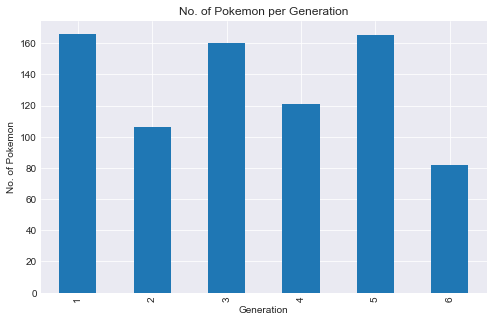

In [1046]:
ax_gen= gen_df.plot(kind='bar', figsize=(8,5))

#sns.barplot(x=gen_df.index,y=gen_df.values)
ax_gen.set_xlabel("Generation")
ax_gen.set_ylabel("No. of Pokemon")
ax_gen.set_title("No. of Pokemon per Generation")

#ax_gen.invert_yaxis()

plt.show()

The first generation had the most Pokemon (including their alternate and Mega Evolved forms) at 166, while the sixth generation had the least with only 82 Pokemon.

### Number of Legendary vs. Non-legendary Pokemon

Next, the number of Pokemon that are Legendary will be compared to the number of Pokemon that are Non-legendary.

In [1047]:
legend_df = new_pkmn_df.groupby(['Legendary']).Total.count()

legend_df.head(2)

Legendary
False    735
True      65
Name: Total, dtype: int64

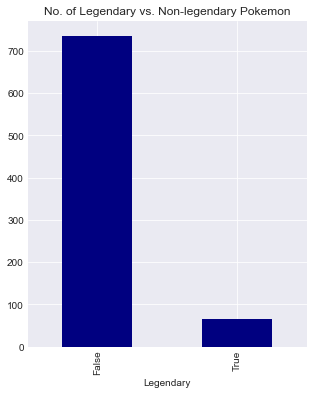

In [1048]:
ax_legend= legend_df.plot(kind='bar', figsize=(5,6), color="navy")

ax_legend.set_title("No. of Legendary vs. Non-legendary Pokemon")

plt.show()

Majority of the Pokemon (including alternate forms and Mega Evolutions) recorded are not legendary, amounting to 735 Pokemon, while the remaining few 65 are legendary Pokemon.

### Number of Pokemon per Primary and per Secondary Types

It is worth taking note of the number of Pokemon per primary and secondary types as well, which will help in determining the most frequent primary and secondary type respectively. The dataset is therefore grouped by Type 1 and counted for the primary types while the dataset is also separately grouped by Type 2 and counted for the secondary types.

In [1049]:
type1_df= new_pkmn_df.groupby(['Type 1'])['Total'].count()

type1_df.head(18)

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Total, dtype: int64

In [1050]:
type2_df= new_pkmn_df.groupby(['Type 2'])['Total'].count()

type2_df.head(18)

Type 2
Bug          3
Dark        20
Dragon      18
Electric     6
Fairy       23
Fighting    26
Fire        12
Flying      97
Ghost       14
Grass       25
Ground      35
Ice         14
Normal       4
Poison      34
Psychic     33
Rock        14
Steel       22
Water       14
Name: Total, dtype: int64

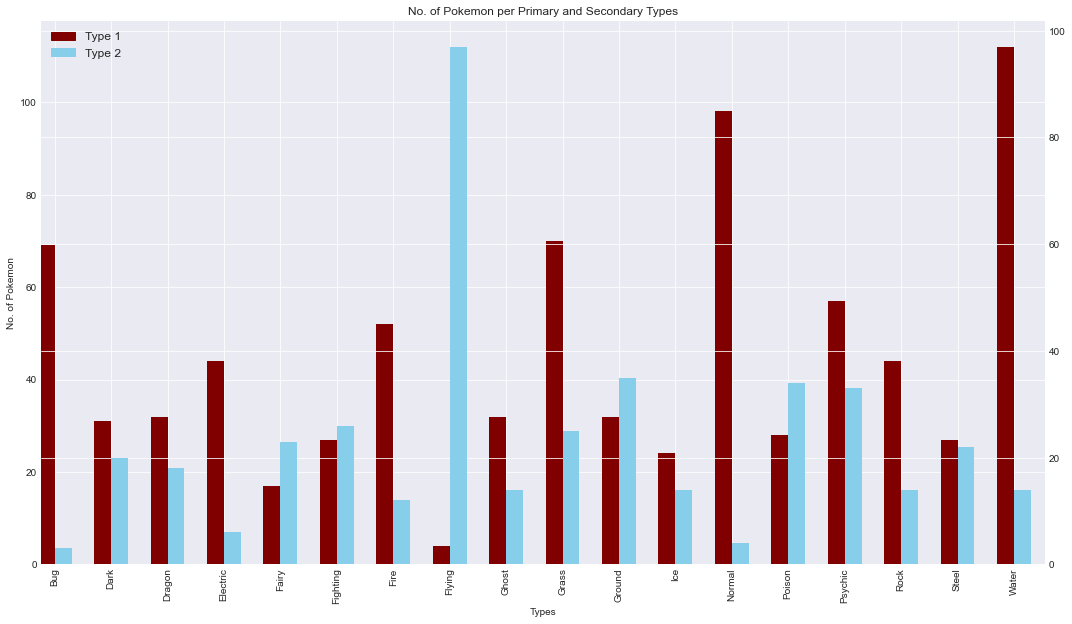

In [1051]:
fig = plt.figure(figsize = (18, 10))
ax_type1 = fig.add_subplot(111)
ax_type2 = ax_type1.twinx()

type1_df.plot(kind='bar', ax=ax_type1, color= 'maroon', width=0.3, position=1)
type2_df.plot(kind='bar', ax=ax_type2, color= 'skyblue', width=0.3, position=0)

ax_type1.set_ylabel('No. of Pokemon')
ax_type1.set_xlabel('Types')

colors = {'Type 1':'maroon', 'Type 2':'skyblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels, loc=2, fontsize=12)

plt.title("No. of Pokemon per Primary and Secondary Types")
plt.show()

A total of 112 Pokemon have Water as their first type, making it the most common primary type, while only four Pokemon have the Flying type, making it the least common primary type. For secondary types, 97 Pokemon have the Flying type, making it the most common secondary type, while only three Pokemon have the Bug type, making it the least common secondary type. 

### Most Common Type Combination

The dataset is also grouped by both Type 1 and 2 to determine the most frequent type combination.

In [1052]:
combo_df = new_pkmn_df.groupby(['Type 1', 'Type 2'])['Total'].count()
new_combo_df = combo_df.nlargest(5)

new_combo_df.head(5)

Type 1  Type 2
Normal  Flying    24
Grass   Poison    15
Bug     Flying    14
        Poison    12
Ghost   Grass     10
Name: Total, dtype: int64

Text(0.5, 1.0, 'Most Common Type Combination')

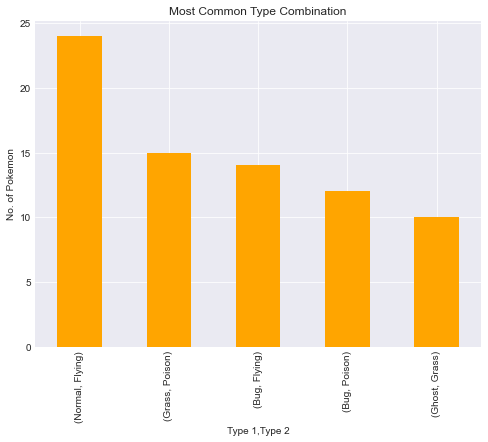

In [1053]:
combo_ax = new_combo_df.plot(kind='bar', figsize=(8,6), color="orange")

combo_ax.set_ylabel("No. of Pokemon")
combo_ax.set_title("Most Common Type Combination")

While Water may be the most commmon primary type and Flying for most common secondary type, the most common type combination is Normal/Flying, with a total of 24 Pokemon sharing this type combination.

To start determining the strongest Pokemon for the best Pokemon team, we first establish the stat total as our basis. From there we can check for the distribution of these stat totals per category - Pokemon types, Generation, and Legendary status.

### Strongest Primary Type (Distribution of Stat Totals per Primary Type)

In [1054]:
type_colors = ['#A8B820', #Bug
               '#705848', #Dark
               '#7038F8', #Dragon
               '#F8D030', #Electric
               '#EE99AC', #Fairy
               '#C03028', #Fighting
               '#F08030', #Fire
               '#A890F0', #Flying
               '#705898', #Ghost
               '#78C850', #Grass
               '#E0C068', #Ground
               '#98D8D8', #Ice
               '#A8A878', #Normal
               '#A040A0', #Poison
               '#F85888', #Psychic
               '#B8A038', #Rock
               '#B8B8D0', #Steel
               '#6890F0', #Water
              ]

Above is a custom color palette using the color codes of Pokemon types taken from https://bulbapedia.bulbagarden.net/wiki/Category:Type_color_templates

Text(0.5, 1.0, 'Distribution of Stat Totals per Primary Type')

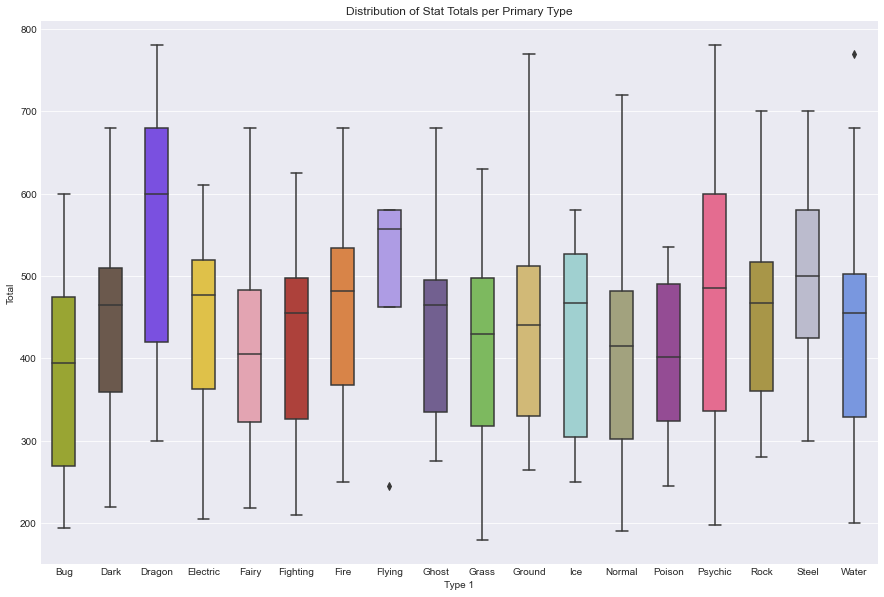

In [1055]:
plt.figure(figsize=(15,10))
types_total_ax = sns.boxplot(data= new_pkmn_df.sort_values(by='Type 1'), x='Type 1', y='Total', width=0.5, palette=type_colors)
types_total_ax.set_title("Distribution of Stat Totals per Primary Type")

#types_total_ax = sns.swarmplot(data= new_pkmn_df.sort_values(by='Type 1'), x='Type 1', y='Total', color='0.25')

The stat totals of primary Dragon-type Pokemon are distributed over higher values, making it the primary type with most Pokemon having high stat totals. The primary Bug type has a stat total distribution over lower values, making it the primary type with most Pokemon having low stat totals.

### Strongest Secondary Type (Distribution of Stat Totals per Secondary Type)

Text(0.5, 1.0, 'Distribution of Stat Totals per Secondary Type')

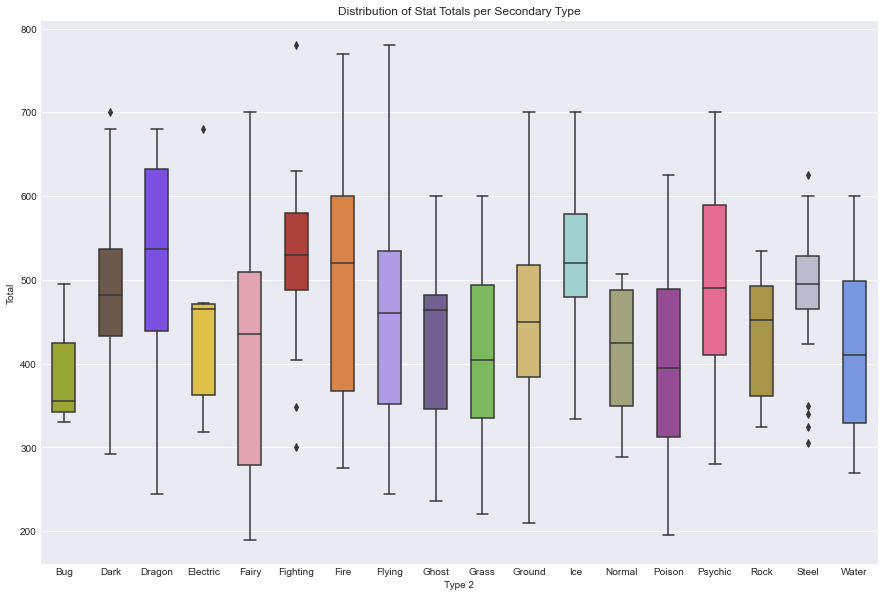

In [1056]:
plt.figure(figsize=(15,10))
types2_total_ax = sns.boxplot(data= new_pkmn_df.sort_values(by='Type 2'), x='Type 2', y='Total', width=0.5, palette=type_colors)
types2_total_ax.set_title("Distribution of Stat Totals per Secondary Type")

#types2_total_ax = sns.swarmplot(data= new_pkmn_df.sort_values(by='Type 2'), x='Type 2', y='Total', color='0.25')

The stat totals of secondary Dragon-type Pokemon are distributed over higher values, making it the secondary type with most Pokemon having high stat totals as well. The secondary Bug type also has a stat total distribution over lower values, also making it the secondary type with most Pokemon having low stat totals.

### Strongest Generation (Distribution of Stat Totals per Generation)

Text(0.5, 1.0, 'Distribution of Stat Totals per Generation')

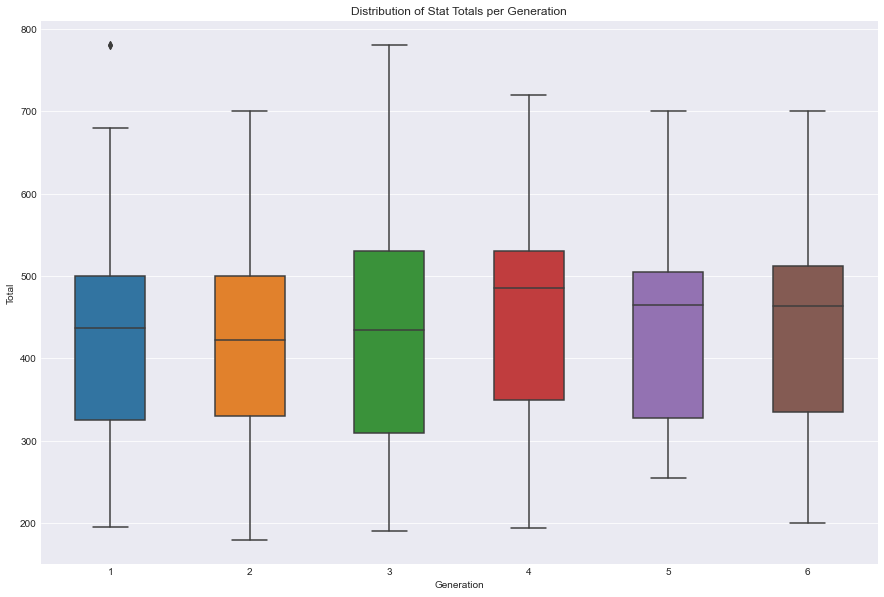

In [1057]:
plt.figure(figsize=(15,10))
gen_total_ax = sns.boxplot(data= new_pkmn_df.sort_values(by='Generation'), x='Generation', y='Total', width=0.5)
gen_total_ax.set_title("Distribution of Stat Totals per Generation")

#gen_total_ax = sns.swarmplot(data= new_pkmn_df.sort_values(by='Generation'), x='Generation', y='Total', color='0.25')

Generation 4 has a distribution of stat totals over higher values, making it the Generation with most Pokemon having higher stat totals. However it should be noted that the Pokemon with the highest stat total values themselves are actually in Generation 1 (hence the outlier) as well as in Generation 3 (hence having the highest max value).

### Distribution of Stat Totals between Legendary and Non-legendary Pokemon

Text(0.5, 1.0, 'Distribution of Stat Totals between Legendary and Non-legendary Pokemon')

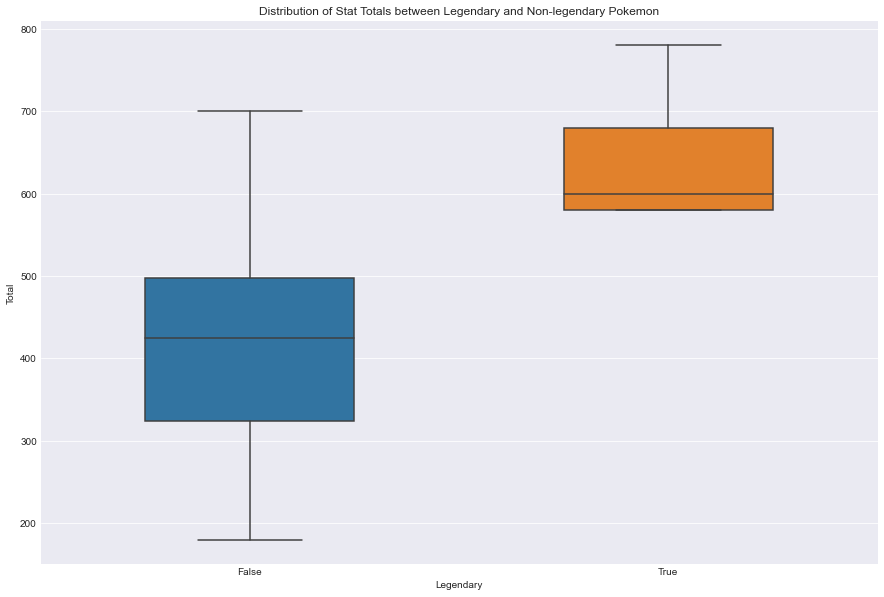

In [1058]:
plt.figure(figsize=(15,10))
legend_total_ax = sns.boxplot(data= new_pkmn_df.sort_values(by='Legendary'), x='Legendary', y='Total', width=0.5)
legend_total_ax.set_title("Distribution of Stat Totals between Legendary and Non-legendary Pokemon")

#legend_total_ax = sns.swarmplot(data= new_pkmn_df.sort_values(by='Legendary'), x='Legendary', y='Total', color='0.25')

The stat totals of Legendary Pokemon have a distribution higher values compared to Non-legendaries, meaning that Legendary Pokemon are generally more powerful.

### Pokemon with Highest Stat Totals

Now the strongest Pokemon will be determined by listing down the first five Pokemon with the highest stat totals.

In [1059]:
max_total_df = new_pkmn_df.nlargest(5, 'Total')

max_total_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,Mega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
422,382,Primal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


Text(0.5, 1.0, 'Pokemon with Highest Stat Totals (Top 5)')

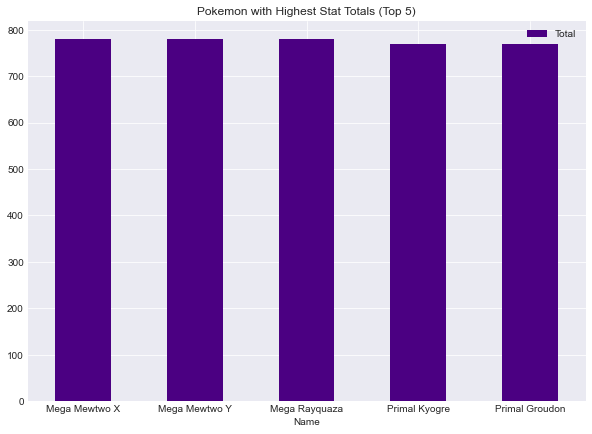

In [1060]:
new_max_total_df = max_total_df[['Name','Total']]
new_max_total_ax = new_max_total_df.plot.bar(x="Name", y="Total", color="indigo", rot=0, figsize=(10,7))
new_max_total_ax.set_title("Pokemon with Highest Stat Totals (Top 5)")

The Pokemon with the highest stat totals are Mega Mewtwo X, Mega Mewtwo Y, and Mega Rayquaza, who all have a stat total of 780.

Note that the first five Pokemon with the highest stat total are all legendary Pokemon, so non-legendary Pokemon with the highest stat total will be checked for extra information.

### Pokemon with the Highest Stat Total (Non-legendary)

In [1061]:
max2_total_df = new_pkmn_df[new_pkmn_df['Legendary']==False]

max2_total_df = max2_total_df.nlargest(5, 'Total')
max2_total_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
268,248,Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
409,373,Mega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,376,Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
494,445,Mega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False


Text(0.5, 1.0, 'Non-legendary Pokemon with Highest Stat Totals (Top 5)')

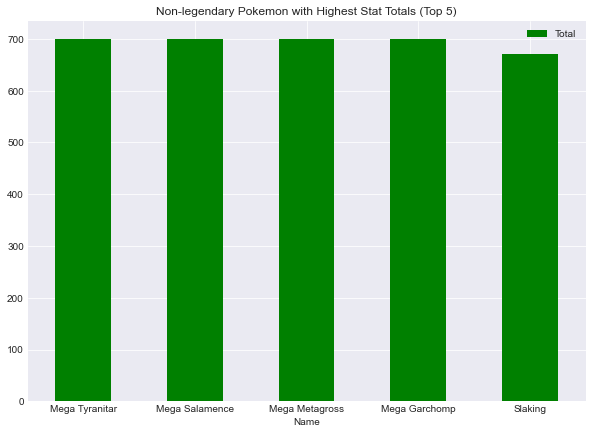

In [1062]:
new_max2_total_df = max2_total_df[['Name','Total']]
new_max2_total_ax = new_max2_total_df.plot.bar(x="Name", y="Total", color="green", rot=0, figsize=(10,7))
new_max2_total_ax.set_title("Non-legendary Pokemon with Highest Stat Totals (Top 5)")

Mega Tyranitar, Mega Salamence, Mega Metagross, and Mega Garchomp are all tied for non-legendary Pokemon with the highest stat total at 700. Meanwhile Slaking places fifth in the list with a stat total of 670, making it the Pokemon with the highest stat total that is not a Mega Evolved Pokemon.

Having determined the strongest Pokemon based on stat total, the list of Pokemon with the highest value for each specific stat - HP, Attack, Defense, Special Attack, Special Defense, and Speed - will be determined in order to find out if the same strongest Pokemon will be listed in these other evaluations.

### Pokemon with Highest HP

In [1063]:
#max_hp_df = max_hp_df[['Name', 'Type 1', 'Type 2', 'HP', 'Generation', 'Legendary']]
max_hp_df = new_pkmn_df.nlargest(5, 'HP')

max_hp_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False


Text(0.5, 1.0, 'Pokemon with Highest HP (Top 5)')

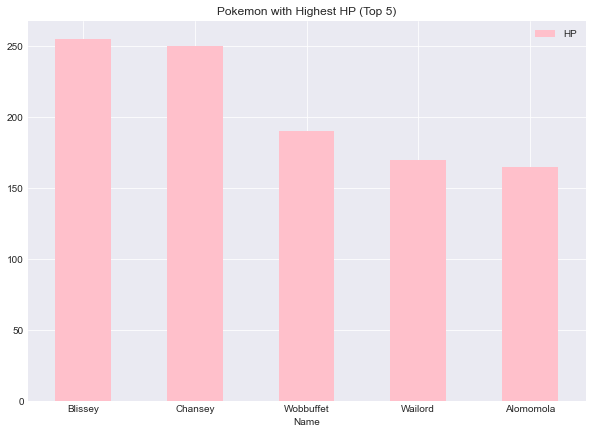

In [1064]:
new_max_hp_df = max_hp_df[['Name','HP']]
new_max_hp_ax = new_max_hp_df.plot.bar(x="Name", y="HP", color="pink", rot=0, figsize=(10,7))
new_max_hp_ax.set_title("Pokemon with Highest HP (Top 5)")

In terms of HP, Blissey has the highest with an HP stat at 255, followed by Chansey with 250, Wobbuffet with 190, Wailord with 170, and Alomomola with 165.

### Pokemon with Highest Attack

In [1065]:
#max_atk_df = new_pkmn_df[['Name', 'Type 1', 'Type 2', 'Attack', 'Generation', 'Legendary']]
max_atk_df = new_pkmn_df.nlargest(5, 'Attack')

max_atk_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
232,214,Mega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
424,383,Primal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,Deoxys Attack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True


Text(0.5, 1.0, 'Pokemon with Highest Attack (Top 5)')

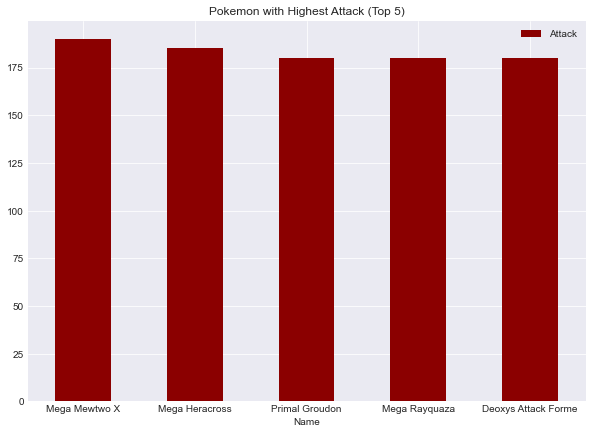

In [1066]:
new_max_atk_df = max_atk_df[['Name','Attack']]
new_max_atk_ax = new_max_atk_df.plot.bar(x="Name", y="Attack", color="darkred", rot=0, figsize=(10,7))
new_max_atk_ax.set_title("Pokemon with Highest Attack (Top 5)")

The highest attacker is Mega Mewtwo X with an Attack stat of 190, followed by Mega Heracross with 185, then Primal Groudon,  Mega Rayquaza, and Deoxys Attack Form all tied at 180.

### Pokemon with Highest Defense

In [1067]:
#max_def_df = new_pkmn_df[['Name', 'Type 1', 'Type 2', 'Defense', 'Generation', 'Legendary']]
max_def_df = new_pkmn_df.nlargest(5, 'Defense')

max_def_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,Mega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,Mega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True


Text(0.5, 1.0, 'Pokemon with Highest Defense (Top 5)')

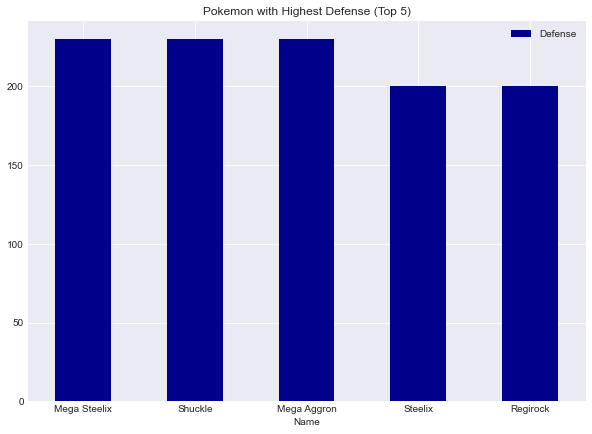

In [1068]:
new_max_def_df = max_def_df[['Name','Defense']]
new_max_def_ax = new_max_def_df.plot.bar(x="Name", y="Defense", color="darkblue", rot=0, figsize=(10,7))
new_max_def_ax.set_title("Pokemon with Highest Defense (Top 5)")

The Pokemon with the highest Defense are Mega Steelix, Shuckle, and Mega Aggron with the same Defense stat of 230, followed by regular Steelix and Regirock with the same Defense stat of 200.

### Pokemon with Highest Special Attack

In [1069]:
max_spatk_df = new_pkmn_df.nlargest(5, 'Sp. Atk')

max_spatk_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,150,Mega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
422,382,Primal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
426,384,Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
429,386,Deoxys Attack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
71,65,Mega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False


Text(0.5, 1.0, 'Pokemon with Highest Special Attack (Top 5)')

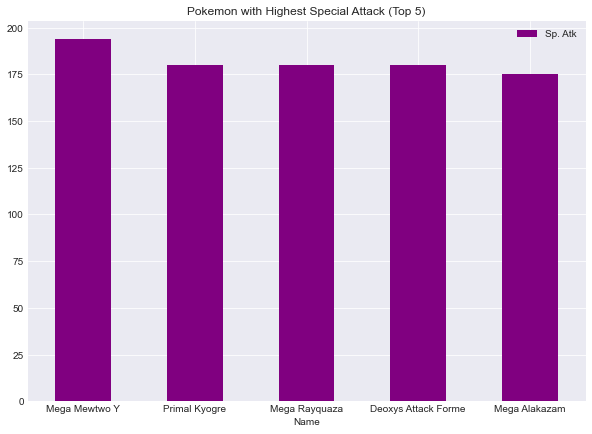

In [1070]:
new_max_spatk_df = max_spatk_df[['Name','Sp. Atk']]
new_max_spatk_ax = new_max_spatk_df.plot.bar(x="Name", y="Sp. Atk", color="purple", rot=0, figsize=(10,7))
new_max_spatk_ax.set_title("Pokemon with Highest Special Attack (Top 5)")

The highest special attacker is Mega Mewtwo Y with a Special Attack stat of 194, followed by a three-way tie between Primal Kyogre, Mega Rayquaza, and Deoxys Attack Form at 180, and lastly Mega Alakazam at 175.

### Pokemon with Highest Special Defense

In [1071]:
max_spdef_df = new_pkmn_df.nlargest(5, 'Sp. Def')

max_spdef_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
422,382,Primal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
430,386,Deoxys Defense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
269,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True


Text(0.5, 1.0, 'Pokemon with Highest Special Defense (Top 5)')

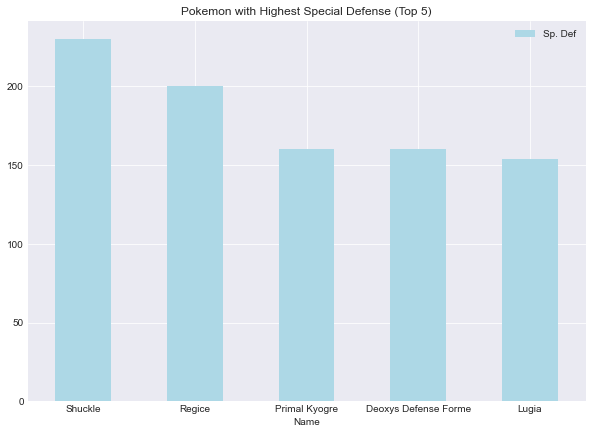

In [1072]:
new_max_spdef_df = max_spdef_df[['Name','Sp. Def']]
new_max_spdef_ax = new_max_spdef_df.plot.bar(x="Name", y="Sp. Def", color="lightblue", rot=0, figsize=(10,7))
new_max_spdef_ax.set_title("Pokemon with Highest Special Defense (Top 5)")

Shuckle has the highest Special Defense stat at 230, followed by Regice at 200, then both Primal Kyogre and Deoxys Defense Form at 160, and lastly Lugia at 154. 

### Pokemon with Highest Speed

In [1073]:
max_spd_df = new_pkmn_df.nlargest(5, 'Speed')

max_spd_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,Deoxys Speed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
315,291,Ninjask,Bug,Flying,456,61,90,45,50,50,160,3,False
71,65,Mega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
154,142,Mega Aerodactyl,Rock,Flying,615,80,135,85,70,95,150,1,False
428,386,Deoxys Normal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True


Text(0.5, 1.0, 'Pokemon with Highest Speed (Top 5)')

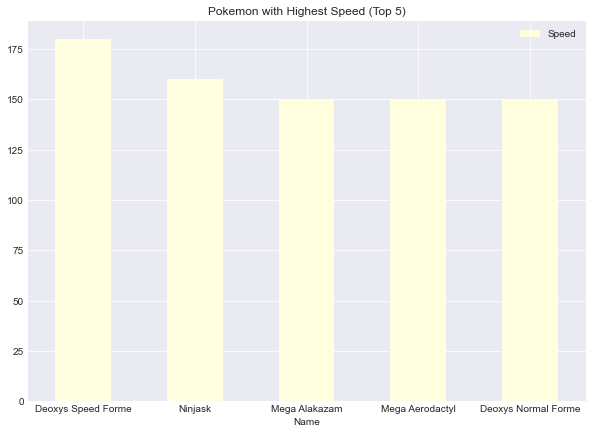

In [1074]:
new_max_spd_df = max_spd_df[['Name','Speed']]
new_max_spd_ax = new_max_spd_df.plot.bar(x="Name", y="Speed", color="lightyellow", rot=0, figsize=(10,7))
new_max_spd_ax.set_title("Pokemon with Highest Speed (Top 5)")

The fastest Pokemon is Deoxys Speed Form having a 180 Speed stat, followed by Ninjask with 160, then Mega Alakazam, Mega Aerodactyl, and Deoxys Normal Form all with a Speed stat of 150.

## Conclusion

Based on the data analyzed, the strongest or best Pokemon are generally those with the highest stat totals. Legendary Pokemon generally have higher stat totals, which means they are usually stronger compared to Non-legendary Pokemon. This makes sense, as the Pokemon with the highest stat total are Mega Mewtwo X, Mega Mewtwo Y, and Mega Rayquaza, all of which are Legendary Pokemon. It should be noted however that despite having the highest stat total, these Pokemon do not necessarily have the highest stats individually, and the list of Pokemon with the highest specfic stats (HP, Attack, Defense, Special Attack, Special Defense, or Speed) will differ.

If the aim is to find the strongest Pokemon based on type, Dragon-type Pokemon generally have higher stat totals, while Bug-type Pokemon will generally have lower stat totals, while if aiming for strongest Pokemon based on Generation, Pokemon of Generation 4 will generally have higher stat totals, but will still be exceeded by the aforementioned strongest Pokemon, who are in Generations 1 and 3.